## Assignment I
### Box Filter and Fast Running Box Filter

The purpose of this assignment is to implement two different filters. The first of them is the simple Box Filter implementation, while the second one should be done as fast run filter. The inputs for the program are the source image and the filter size, which should be an odd number. The outputs for the program are both target images, for each of the algorithms, as well as the execution time of each implementation.

Firstly, we import the mount the google drive colab importing its related library.

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Afterwards, the directory is changed to the folder in which the Test Images are stored.

In [0]:
import os
os.chdir("/content/gdrive/My Drive/BasicAlgorithmsforDigitalImaging/Lab1")

Once this is done, the next step is to import the requirements for both implementations. They are OpenCV library cv2, numpy, cv2_imshow and time library.

In [0]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import time

In order to set the parameter needed for the filter size, it is done asking the user its size.

In [0]:
n = int(input("Enter a number for kernel size (filter size): "))

Enter a number for kernel size (filter size): 7


Finally, both implementations are shown below:

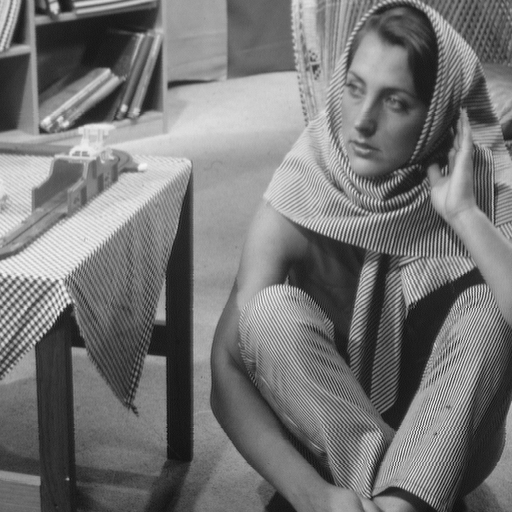

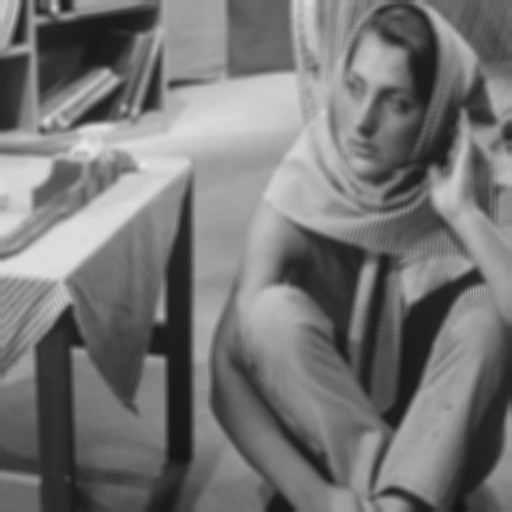

The time needed to filter the image using Box Filter is 41.78950262069702 seconds.


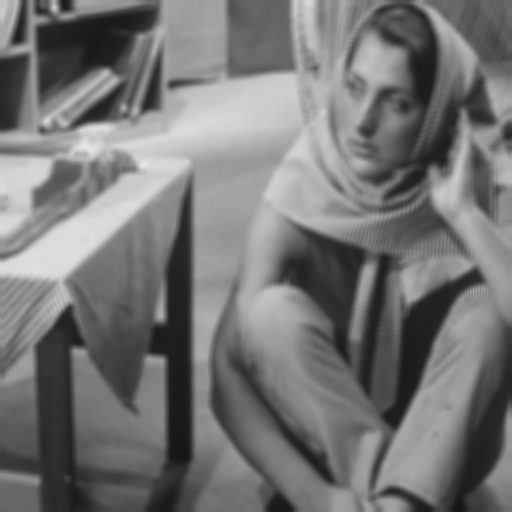

The time needed to filter the image using Fast Running Box Filter is 0.22266030311584473 seconds.


In [0]:
# Loads an image.
src = cv.imread("TestImages/all_png/barbara.png", cv.IMREAD_GRAYSCALE)
    
# Check if image is loaded correctly.
if src is None:
  print ('Error opening image!')  
  
else:
  # Show the image without a filter.
  cv2_imshow(src)
  
  # Define row length and column length, as they will be widely used during the 
  # program.
  row_length = src.shape[0]
  col_length = src.shape[1]
  
  # Initialize data structure s[x] to zero, for Fast Running Box Filter.
  s = [0] * src.shape[1]
  
  # Define the matrix needed for the kernel, the Box Filter target image and the
  # Fast Running Box Filter target image.
  kernel = np.ones((n,n))
  target = np.zeros((src.shape[0],src.shape[1]))
  fast_target = np.zeros((src.shape[0],src.shape[1]))
  
  # Define b as the value to difference edge and convolutional computation.
  b = int((n-1)/2)
  
  ### BOX FILTER
  # Start measuring the execution time for Box Filter.
  start = time.time()
  
  # Compute the values for each of the pixels in the matrix, instead the edges.
  for i in range(b, row_length-b):
    for j in range(b, col_length-b):
      suma = 0
      #target[i,j] = np.sum(np.multiply(src[i-b:i+b+1, j-b:j+b+1],kernel)) / (n*n)
      for k in range(n):
        for l in range(n):
          suma = suma + ( src[i-b+k,j-b+l]*kernel[k,l] / (n*n) )
      target[i,j] = suma
  
  # Now, compute the edges for firsts and lasts rows with the same value as the
  # pixel that it is next to it. 
  for i in range(row_length):  
    for a in range(b+1):
      target[i,b-a] = target[i,b]
      target[i,col_length-1-b+a] = target[i,col_length-b-1]
        
  # Now, compute the edges for firsts and lasts columns with the same value as 
  # the pixel that it is next to it.
  for j in range(col_length):
    for a in range(b+1):
      target[b-a,j] = target[b,j]
      target[row_length-1-b+a,j] = target[row_length-b-1,j]
  
  # Stop measuring the execution time for Box Filter.
  last = time.time()
  
  # Show the image after applying the Box Filter.
  cv2_imshow(target)
  
  # Print out the execution time of the Box Filter.
  print("The time needed to filter the image using Box Filter is " + str(last - start) + " seconds.")
  
  ### FAST RUNNING BOX FILTER
  
  # We initialize the sum to 0.
  suma = 0
  
  # Start measuring the execution time for Fast Running Box Filter.
  start = time.time()
  
  # At first, it should be computed the first pixel with a simple loop. 
  # Pixel position: [b,b], being b=(n-1)/2 and n the size of the kernel.
  for j in range(kernel.shape[1]):
    s[j] = np.sum(np.multiply(src[0:2*b+1, j], kernel[:,j])) / (n*n)
    suma = suma + s[j]
    fast_target[b,b] = suma
  
  # Once this pixel is computed, we traverse all columns, except the borders.
  # This is what is called shift in row in the slides.
  # Then, it is computed the pixel position: [b,j], being j the index through
  # which the columns are traversed.
  for j in range(b+1, col_length - b):
    s[j+b] = np.sum(np.multiply(src[0:2*b+1, j+b], kernel[:,2*b])) / (n*n)
    suma = suma + s[j+b] - s[j-b-1]
    fast_target[b,j] = suma
  
  # Now, it is time to do the next row operation (following the slides).
  # For that, we traverse all the rows, initialize the sum again, re-compute the
  # s[x] vector for every row and compute the sum for pixel position: [i,b].
  # i is the index is used to traverse all the rows (except the borders).
  for i in range(b+1, row_length - b):
    suma = 0
    s[:] = s[:] + (src[i+b,:] / (n*n)) - (src[i-b-1,:] / (n*n))
    for j in range(kernel.shape[1]):
      suma = suma + s[j]
    fast_target[i,b] = suma
  
    # Finally, we use the computations already done to compute the other pixels.
    # Pixel position: [i,j].
    for j in range(b+1, col_length - b):
      suma = suma + s[j+b] - s[j-b-1]
      fast_target[i,j] = suma
  
  # Now, compute the edges for firsts and lasts rows with the same value as the
  # pixel that it is next to it. 
  for i in range(row_length):  
    for a in range(b+1):
      fast_target[i,b-a] = fast_target[i,b]
      fast_target[i,col_length-1-b+a] = fast_target[i,col_length-b-1]
        
  # Now, compute the edges for firsts and lasts columns with the same value as 
  # the pixel that it is next to it.
  for j in range(col_length):
    for a in range(b+1):
      fast_target[b-a,j] = fast_target[b,j]
      fast_target[row_length-1-b+a,j] = fast_target[row_length-b-1,j]
  
  # Stop measuring the execution time for Fast Running Box Filter.
  last = time.time()
  
  # Show the image after applying the Fast Running Box Filter.
  cv2_imshow(fast_target)
  
  # Print out the execution time of the Fast Running Box Filter.
  print("The time needed to filter the image using Fast Running Box Filter is " + str(last - start) + " seconds.")